In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Install Libraries**

In [ ]:
# !pip install tensorflow-gpu==1.15
# !pip install tensorflow-gpu==2.0.0 
# !pip install tensorflow==2.2.0
# !pip install tensorflow==2.3.1
!pip install --upgrade tensorflow 


     |████████████████████████████████| 320.4MB 49kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
import tensorflow as tf

# !pip install keras==2.4.2
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np  
import pandas as pd 
import re           
import os
from bs4 import BeautifulSoup 

from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=51810f4c0a1b814f53e36dde60198f4ae2bb32db31c72f8c9dcc4162df246236
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
!pip install rouge
from rouge import Rouge

# **Bleu**

In [ ]:
import nltk
import nltk.translate.bleu_score as bleu

!pip install bert-embedding
from bert_embedding import BertEmbedding
bert_E = BertEmbedding()
def token_list(embeddings, no_sep=False):
    """
    Returns with the tokens of the embedding data from the BertEmbedding.

    Params:
        embeddings: The embedding data from BertEmbedding
        no_sep: If True, the separators are trimmed.
    Return:
        tokens: list of tokens
    """
    if no_sep:
        return embeddings[0][0][1:-1]
    return embeddings[0][0]

def sentence_embs(embeddings):
    """Return with the sentence level embeddings"""
    return embeddings[0][1][0]
def prep(sentence):
    """Return with tokens and sentence level embeddings"""
    embs = bert_E([sentence])
    tokens = token_list(embs, no_sep=True)
    se = sentence_embs(embs)
    return tokens, se

SmoothingFunction = nltk.translate.bleu_score.SmoothingFunction()


     |████████████████████████████████| 13.8MB 354kB/s 
     |████████████████████████████████| 29.6MB 98kB/s 
     |████████████████████████████████| 215kB 47.4MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-cp36-none-any.whl size=259917 sha256=955708e0ffbbc2f26355f386e712332e5a392b54ce43b357d13ce793c6d33edf
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: sea

Vocab file is not found. Downloading.


# **Read Data**

In [ ]:
def sent_tokenizer(s):
    ishightlight=True
    article_sents = []
    reference_summary =[]
    for sent in s.split('\n'):
          listOfWords = ['@highlight']
          if all(word in sent for word in listOfWords):
               ishightlight=False
          if ishightlight==True:
                # print(sent)
                article_sents.append(sent.strip())
          if  ishightlight==False:
                # print(sent)
                reference_summary.append(sent.strip())
    splitted_article_sents=article_sents
   
    article_sents = " ".join(article_sents)
    return article_sents, reference_summary, splitted_article_sents


In [ ]:
directory_DailyMail = '/content/drive/MyDrive/Colab Notebooks/DM/'
directory_CNN = '/content/drive/MyDrive/Colab Notebooks/CNN'
import os
count=0
import pandas as pd

data =  pd.DataFrame(index=[],columns=['Text','Summary'])

if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(directory_DailyMail, topdown=True ): 
        print (files) 
        print ('--------------------------------') 
    for fileName in files: 
      print(count)
      with open('/content/drive/MyDrive/Colab Notebooks/DM/'+fileName, mode='r') as file:
          fileContent = file.read()
      tokenized_sentence,reference_summary, splitted_article_sents = sent_tokenizer(fileContent)
      df_new_row = pd.DataFrame(data=np.array([[tokenized_sentence,reference_summary]]), columns=['Text','Summary'])
      data = pd.concat([data,df_new_row], ignore_index=True)
      count=count+1
      if count==20:
        break;

['0a3b16c1ca88183a6de59149cbeed3cb0e6bb8e2.story', '00b6b0dedac7e54899b3fb0989c09ab676c4b5b5.story', '0c488875bfaeb8b7d08a38e6ff64139d5ec88d02.story', '00c62cf59818178a15994170384fe1e7f5bd9fdd.story', '0c521c600996fda1407351aaddec54b983aacb25.story', '0ce932cc492f123d1f7ec7af449ad7ca56bc8d32.story', '00e545e17083ede3173542866f49d27405d029f0.story', '0bd2c21810b70bfccb2aefc2df0fe8a5fc4302be.story', '0b0dbc8723e53fbc2a64a331bc3625b87bedc850.story', '0cf83c28985e9efe58f9c52d58c596dabc73f317.story', '0bbb67bae2ed1728aa8aee3e16d9882880893d78.story', '0c9c937edb3328f1ca92b3be01b680c30f0eba0e.story', '0cd76753079dd610bda57a82ee5512e6edf8cdeb.story', '0bdd402d150259cafea44ebf5c7491c8e6dad77c.story', '0b1c12e2f5f191c6a2f3403b5caea3c9e8a4c75e.story', '0c8af91ed7fa25f5ca38e6f723f718861e6c9576.story', '0000800d9058217f6509d7e63ad475e2de0da611.story', '0ab0b137d63ae824538660f2f315524cf95e7db0.story', '0a0db6c641cedb28c98a2a8de080ec47b68bb9e7.story', '0d27a0aea2eae6915049a7b43f3e6c1d499d979f.story',

In [ ]:
data

,Text,Summary
0,"Traditional GIFs are so last year . 2015 is the year of the Yoyo . A Turkish developer has built a tool that lets users fast-forward and rewind GIFs , and embed the resulting ` Yoyos ' onto websi...","[@highlight, , Yoyo was created by a team of developers from Istanbul, , @highlight, , The tool lets users fast-forward and rewind GIFs taken from the web, , @highlight, , It works with GIF URLs f..."
1,By John Stevens For Daily Mail David Cameron has accused the First Minister of ` desperate ' tactics over his claim that separation will protect the NHS from privatisation . The Prime Minister s...,"[@highlight, , The Prime Minister said health is already devolved to Holyrood, , @highlight, , Mr Salmond said NHS cuts in England would be replicated in Scotland, , @highlight, , Scottish Governm..."
2,"Manchester United began to sow the seeds of change as their 100-strong entourage flew to the USA on Friday . As Louis van Gaal took his new players , Wayne Rooney included , off to Los Angeles , ...","[@highlight, , Entourage of 104 head out to the States for pre season games, , @highlight, , Van Gaal is pulling up the Carrington pitch and getting wind breakers built, , @highlight, , Bebe and A..."
3,Gordon Greer was surprised to hear Robert Lewandowski complaining about his robust challenge in Scotland 's 2-2 draw against Poland last month . The 33-year-old Brighton defender made his competi...,"[@highlight, , Gordon Greer was surprised to hear Robert Lewandowski complaining about his robust challenge in last month 's Euro 2016 qualifier with Poland, , @highlight, , The match ended 2-2 an..."
4,It was one of the biggest trends of 2013 - the selfie . But just a few days into the new year and a new craze has already taken over - the animal selfie . Twitter has been inundated with posts o...,"[@highlight, , Hundreds of #animalselfies have been posted on the social networking site, , @highlight, , Selfies include pictures of monkeys , horses and even bearded dragons, , @highlight, , Com..."
5,The man killed today in a fire that broke out in a New York City high-rise has been identified as 27-year-old Daniel McClung . McClung was found in the stairwell of 500 West 43rd Street and taken...,"[@highlight, , Authorities identified 27-year-old Daniel McClung as the victim of the fire that broke out this morning in a New York City apartment high-rise, , @highlight, , Blaze broke out on th..."
6,"She is one of the hottest stars in Bollywood , currently seen shaking her sari next to a muscle-bound hunchback in the most expensive and ambitious film ever to come out of India . She receives t...","[@highlight, , She had never acted before her screen debut in 2010 film , Madrasapattinam, , @highlight, , Now Amy Jackson has a chauffeur , make-up team and a personal assistant, , @highlight, , ..."
7,"By Belinda Robinson The mum of a 15-month-old toddler who got a coin lodged in his throat has described how lucky she feels that her son survived the drama . Lesley Pattinson , 39 , from Fylingd...","[@highlight, , Mum Lesley Pattinson had to save her son after he swallowed a coin at home, , @highlight, , But the family lives in a remote area where the local hospital is miles away, , @highligh..."
8,Samantha Cameron is famous for her love of Scandinavian minimalist style and it seems she 's also a fan of IKEA furniture and Danish butter . The Prime Minister 's wife was hosting a breakfast for...,"[@highlight, , Photos taken during a charity breakfast at No. 10 reveal new additions to Samantha Cameron 's famous kitchen, , @highlight, , Among them are a # 1,615 Flos Arco floor lamp , a # 250..."
9,Latest arrest : This is George Zimmerman 's mugshot from the Seminole Sheriff 's Office in Florida after his arrest on Friday night for assault and domestic violence with a weapon Following his r...,"[@highlight, , Third time Trayvon Martin 's killer has been arrested for domestic violence, , @highlight, , Arrested at 10pm on Friday evening in Flori

In [ ]:
data.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
data['Text'][:10]

0    Traditional GIFs are so last year . 2015 is the year of the Yoyo .  A Turkish developer has built a tool that lets users fast-forward and rewind GIFs , and embed the resulting ` Yoyos ' onto websi...
1    By John Stevens For Daily Mail  David Cameron has accused the First Minister of ` desperate ' tactics over his claim that separation will protect the NHS from privatisation .  The Prime Minister s...
2    Manchester United began to sow the seeds of change as their 100-strong entourage flew to the USA on Friday .  As Louis van Gaal took his new players , Wayne Rooney included , off to Los Angeles , ...
3    Gordon Greer was surprised to hear Robert Lewandowski complaining about his robust challenge in Scotland 's 2-2 draw against Poland last month .  The 33-year-old Brighton defender made his competi...
4    It was one of the biggest trends of 2013 - the selfie .  But just a few days into the new year and a new craze has already taken over - the animal selfie .  Twitter has been i

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['Summary'][:10]

0    [@highlight, , Yoyo was created by a team of developers from Istanbul, , @highlight, , The tool lets users fast-forward and rewind GIFs taken from the web, , @highlight, , It works with GIF URLs f...
1    [@highlight, , The Prime Minister said health is already devolved to Holyrood, , @highlight, , Mr Salmond said NHS cuts in England would be replicated in Scotland, , @highlight, , Scottish Governm...
2    [@highlight, , Entourage of 104 head out to the States for pre season games, , @highlight, , Van Gaal is pulling up the Carrington pitch and getting wind breakers built, , @highlight, , Bebe and A...
3    [@highlight, , Gordon Greer was surprised to hear Robert Lewandowski complaining about his robust challenge in last month 's Euro 2016 qualifier with Poland, , @highlight, , The match ended 2-2 an...
4    [@highlight, , Hundreds of #animalselfies have been posted on the social networking site, , @highlight, , Selfies include pictures of monkeys , horses and even bearded dragons

In [ ]:

def summary_cleaner(text):
    newString = re.sub('"','', str(text))
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [ ]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("\n")

Review: traditional gifs last year year yoyo turkish developer built tool lets users fast forward rewind gifs embed resulting yoyos onto websites blogs yoyos also tweeted shared facebook tool works gif url including tumblr posts vines yoyo created team developers istanbul web based tool lets users fast forward rewind gifs taken web works gif urls tumblr vine twitter imgur control yoyo hover mouse cursor image move left right tool created team developers istanbul yoyo basically tool gives control gifs explained site instead letting play interfere course gifs users see collection yoyos site news feed follow users creating account users see collection yoyos site news feed follow users creating account registered users create post yoyos site lrb pictured rrb users click heart icons yoyos repost profiles using arrow icons clicking menu button top right hand corner additionally reveals yoyos embed code lrb pictured rrb registered users create post yoyos site add yoyo click blue yoyo button t

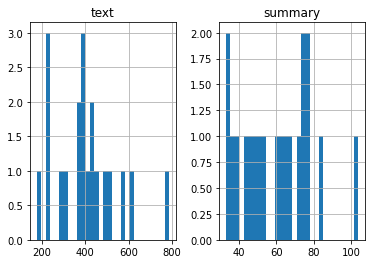

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()


In [ ]:

max_len_text=80 
max_len_summary=10
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True)

In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [ ]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'
!unzip '/content/glove.6B.zip'

--2020-12-07 11:27:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-07 11:27:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-07 11:27:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# GLOVE_DIR = path for glove.6B.100d.txt
def glove_100d_dictionary(GLOVE_DIR):
  embeddings_index = {}
  f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  return embeddings_index

In [ ]:
embeddings_index = {}
f = open(os.path.join('/content', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:

word_index = x_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        

# **AttentioLayer**

In [ ]:
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

# **Model**

In [ ]:
# from keras import backend as K 
from tensorflow.keras import backend as K
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, 100, weights=[embedding_matrix],input_length=max_len_text, trainable=False)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(x_voc_size, 100, weights=[embedding_matrix],input_length=max_len_text, trainable=False) 

dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
# !pip install attention_keras
# from attention_keras.layers.attention import AttentionLayer
# !pip install keras-attention
# !from tensorflow.keras.layers import Attention
# !from Attention import AttentionLayer
# !from tensorflow.keras import Input, layers, models
# !from tensorflow.layers.attention import AttentionLayer
# attn_layer = AttentionLayer()
# attn_layer = AttentionLayer(name='attention_layer') 
# attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
# attention
attn_layer = AttentionLayer()
attn_op, attn_state = attn_layer([encoder_outputs , decoder_outputs])
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attn_op])

# Concat attention output and decoder LSTM output 
# decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 100)      304000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 1202000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
checkpoint_path = "/content/drive/MyDrive/model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
!ls {checkpoint_dir}

'Colab Notebooks'  'Getting started.pdf'   model.ckpt   personal


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_best_only=True, monitor='val_loss',)

# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,  mode='max')
callbacks_list = [cp_callback,es]

In [ ]:

x_tr
y_tr[:,:-1]
y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

array([[[152],
        [ 25],
        [153],
        [ 17],
        [ 12],
        [154],
        [  6],
        [ 51],
        [  7]],

       [[195],
        [  5],
        [196],
        [197],
        [  3],
        [198],
        [ 12],
        [199],
        [  7]],

       [[  9],
        [  2],
        [214],
        [  3],
        [215],
        [  5],
        [  2],
        [216],
        [  7]],

       [[  2],
        [230],
        [231],
        [232],
        [233],
        [  9],
        [234],
        [ 69],
        [  7]],

       [[255],
        [  5],
        [  2],
        [256],
        [ 44],
        [ 21],
        [ 16],
        [257],
        [  7]],

       [[284],
        [285],
        [  9],
        [ 77],
        [ 23],
        [ 37],
        [ 31],
        [286],
        [  7]],

       [[  2],
        [ 47],
        [  4],
        [  2],
        [ 29],
        [ 15],
        [302],
        [303],
        [  7]],

       [[ 79],
        [ 80],
        [ 2

In [ ]:
# history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=2,  callbacks=callbacks_list, batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/2
1/1 [==============================] - ETA: 0s - loss: 6.4118
Epoch 00001: val_loss improved from inf to 5.53811, saving model to /content/drive/MyDrive/model.ckpt
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model.ckpt/assets


1/1 [==============================] - 18s 18s/step - loss: 6.4118 - val_loss: 5.5381
Epoch 2/2
1/1 [==============================] - ETA: 0s - loss: 5.1688
Epoch 00002: val_loss did not improve from 5.53811
1/1 [==============================] - 0s 183ms/step - loss: 5.1688 - val_loss: 6.5295
Epoch 00002: early stopping


# **Plotting Results**

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:

reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    # print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print("sampled_token:",sampled_token)
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
rouge1_f=[]
rouge1_p=[]
rouge1_r=[]
rouge2_f=[]
rouge2_p=[]
rouge2_r=[]
rougel_f=[]
rougel_p=[]
rougel_r=[]
bleu_score=[]


In [ ]:
import nltk.translate.bleu_score as bleu

!pip install bert_embedding
from bert_embedding import BertEmbedding
bert_E = BertEmbedding()




In [ ]:
!python -m spacy download pt_core_news_sm


import pt_core_news_sm

nltk.download('stopwords')
nlp = pt_core_news_sm.load()
for i in range(len(x_val)):
  print(i,"  Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")
  summary= seq2summary(y_val[i])
  reference_summary=decode_sequence(x_val[i].reshape(1,max_len_text))
  #Bleu Score
  r0, e0 = prep(summary)
  r1, e1 = prep(reference_summary)
  t0 = nlp(summary)
  t1 = nlp(reference_summary)
  bleu_score.append( bleu.sentence_bleu([r1], r0, smoothing_function=SmoothingFunction.method2))
  # print("r0-r1 bleu score: ", bleu.sentence_bleu([r1], r0, smoothing_function=SmoothingFunction.method2))

  #Rouge Score
  rouge = Rouge()
  scores = rouge.get_scores(summary, reference_summary)
  # print('scores',scores)

  for thisdict in scores:

    rouge1=thisdict['rouge-1']
    rouge1_f.append(rouge1['f'])
    rouge1_p.append(rouge1['p'])
    rouge1_r.append(rouge1['r'])
  
    rouge2=thisdict['rouge-2']
    rouge2_f.append(rouge2['f'])
    rouge2_p.append(rouge2['p'])
    rouge2_r.append(rouge2['r'])

    rougel=thisdict['rouge-l']
    rougel_f.append(rougel['f'])
    rougel_p.append(rougel['p'])
    rougel_r.append(rougel['r'])

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
     |████████████████████████████████| 21.2MB 1.1MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186282 sha256=1353999957bf8949aa830ee6664df941a60fddd51cc4bed5898ebf59f2424960
  Stored in directory: /tmp/pip-ephem-wheel-cache-9ebckjwv/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0   Review: investigating released l

In [ ]:
#    Mean  of rouge score of all articles

# print('Mean of rouge1_p',sum(rouge1_p) / len(rouge1_p))
# print('Mean of rouge1_r',sum(rouge1_r) / len(rouge1_r))
# print('Mean of rouge1_f',sum(rouge1_f) / len(rouge1_f))
# print()
# print('Mean of rouge2_p',sum(rouge2_p) / len(rouge2_p))
# print('Mean of rouge2_r',sum(rouge2_r) / len(rouge2_r))
# print('Mean of rouge2_f',sum(rouge2_f) / len(rouge2_f))
# print()
print('Mean of rougel_p',sum(rougel_p) / len(rougel_p))
print('Mean of rougel_r',sum(rougel_r) / len(rougel_r))
print('Mean of rougel_f',sum(rougel_f) / len(rougel_f))
# Average of Bleu
bleu_average= np.average(bleu_score)
print(bleu_average)
# F1
rouge_average= sum(rougel_r) / len(rougel_r)# Recall of rouge-l
F1 = 2 * (bleu_average * rouge_average) / (bleu_average + rouge_average)
print(F1)

Mean of rougel_p 0.05555555555555555
Mean of rougel_r 0.5
Mean of rougel_f 0.0999999991
0.09287528999566799
0.15665232058557646


In [ ]:
# print("Review:",seq2text(x_val[44]))
# print("Original summary:",seq2summary(y_val[44]))
# print("Predicted summary:",decode_sequence(x_val[44].reshape(1,max_len_text)))